In [4]:
# Importing libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLarsIC
from sklearn.metrics import r2_score
import statsmodels.api as sm
import quandl

### Question 1

1. Linear regression with one explanatory variable (20 points)

- Load in monthly house prices data in pounds sterling (£) from Jan 1991 to Dec 2016 from monthlyHousePricesUK.csv and the FTSE100 index from Yahoo Finance (ticker = ^FTSE) over the same period (01-Jan-1991 to 31-Dec-2016).✅

- a) Using the FTSE100 index monthly returns as dependent variable and the house prices monthly returns as explanatory variable, create a regression model with MATLAB/Python including a constant and calculate the correlation coefficient (5points)✅
- b) What do the results tell us? (5points) ✅
- c) Use a hypothesis test to back up your conclusion about the existence of a significant relationship between these two variables. (10 points) ✅


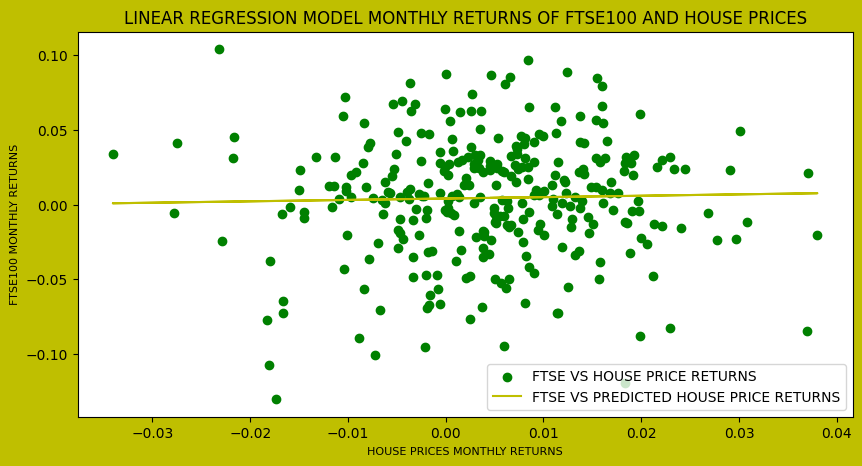

The correlation coefficient is 0.02655129570190995
The p-value is 0.6409049000031647


In [5]:
mHousePrice = pd.read_excel("Monthly.xls")     # Reading Monthly House Price data from excel file
ftse100 = pd.read_csv("FTSE100.csv")           # Reading FTSE100 data from excel file

mHousePriceRenamed = mHousePrice.rename(columns = {"Unnamed: 0": "Date"})           # Renaming the unnamed date field in house prices

# Filtering house price data for the period of (01-Jan-1991 to 31-Dec-2016) | No need for FTSE since its period is correct
mHousePrice19912016 = mHousePriceRenamed.loc[(mHousePriceRenamed["Date"] >= "1991-01-01") & (mHousePriceRenamed["Date"] <= "2016-12-31")]

ftse100["Date"] = pd.to_datetime(ftse100["Date"]) # Converting string dates to date time
ftse100Sorted = ftse100.sort_values(by = "Date", ascending = True, ignore_index = True)   # Sorting the date to match the house prices data set

# MONTHLY RETURNS FOR FTSE100 AND HOUSE PRICES
ftse100MR = ftse100Sorted["Adj Close"].pct_change()
mHPMR = mHousePrice19912016["Average House Price"].pct_change()

# CREATING A REGRESSION MODEL INCLUDING A CONSTANT BY: Calculating linear least-squares regression for FTSE and house prices.
slope, yIntercept, rCC, pVal, stdErr = stats.linregress(mHPMR[1:], ftse100MR[1:])

y = pd.DataFrame(ftse100MR[1:])
x = pd.DataFrame(mHPMR[1:])

# Building a linear regression model - https://realpython.com/linear-regression-in-python/
regr = LinearRegression()

# Fitting the model (Training)
regr.fit(x, y)

# Make predictions of monthly returns for FTSE using the given monthly returns for house prices
prdY = regr.predict(x)

# Plotting: Defining figure properties
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["figure.facecolor"] = "y"
plt.rcParams["figure.edgecolor"] = "r"
plt.title("LINEAR REGRESSION MODEL MONTHLY RETURNS OF FTSE100 AND HOUSE PRICES", fontsize = 12)
plt.ylabel("FTSE100 MONTHLY RETURNS", fontsize = 8)
plt.xlabel("HOUSE PRICES MONTHLY RETURNS", fontsize = 8)

plt.scatter(x, y, color = "g", label = "FTSE VS HOUSE PRICE RETURNS")
plt.plot(x, prdY, color = "y", label = "FTSE VS PREDICTED HOUSE PRICE RETURNS")
plt.legend()
plt.show()

# Printing the correlation coefficient and the p-value
print("The correlation coefficient is", rCC)
print("The p-value is", pVal)

# b) What do the results tell us?
# - The correlation coefficient of 0.02655129570190995 shows a very weak positive relationship, can be said as no relationship
# - This tells us that this data of FTSE100 and House Prices can not be used for linear regression.- It can not be used to predict future value

# c) Hypothesis test to back up the conclusion about the existence of a significant relationship between FTSE and house prices
# Ho: There is no relationship between FTSE100 and House Prices 
#     - The correlation coefficient is too weak.
#     - The p-value of 0.6409049000031647 is greater then the significance level of 0.05.
#     - As the p-value > α, deviating from the null hypothesis is not statistically significant, therefore, Ho is not rejected

# A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected.
# A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

### Question 2

2. Linear regression with multiple explanatory variables (30 points)

- The college.csv file contains information about different US colleges and universities. 
- We are going to use the number of applications received, the number of enrolled students, the number of out of state students, the number of admitted students who were in the top 10% and number of admitted students who were in the top 25% of their class to predict the graduation rate.


- a) Calculate the correlation coefficients of the aforementioned variables. (5 points) ✅
- b) Considering the graduation rate as the dependent variable, use stepwise to build the linear regression model. (5 points)✅
- c) Which predictor variables are useful in predicting the graduation rate? Explain how you got those variables. (5 points)✅
- d) Would the set of predictor variables be useful in predicting the graduation rate if you were to use BIC to select the model? Why? (5 points) ✅
- e) Compare the accuracy of the model using only useful predictors with the accuracy of the model using all five predictors? (5 points) ✅
- f) Given a set of predictors corresponding to Carnegie Mellon University, what graduation rate value should the most accurate model predict? (5 points)✅

In [6]:
# stepwise regression that uses a backwards elimination approach
college = pd.read_csv('college.csv')                                      # Reading US college data from csv file
collegeRenamed = college.rename(columns = {'Unnamed: 0': 'Name'})           # Renaming the unnamed Name field in college

collegeCorVars = ['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc', 'Grad.Rate']
collegeXcols = ['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc' ]
collegeYcol = ['Grad.Rate']

# A) calculating the correlation between aforementioned variables using the pandas .corr() function
corrCoff = collegeRenamed[collegeCorVars].corr()
print("The correlation coefficients of aforementioned variables is\n\n", corrCoff)

# B) https://towardsdatascience.com/stepwise-regression-tutorial-in-python-ebf7c782c922#:~:text=In%20simple%20terms%2C%20stepwise%20regression,the%20accuracy%20of%20our%20prediction
# In simple terms, stepwise regression is a process that helps determine which factors are important and which are not. 
# Certain variables have high p-value and are not meaningfully contributing to the accuracy of the prediction

def getStatistics():
    x = collegeRenamed[collegeXcols]
    y = collegeRenamed[collegeYcol]
    
# getStatistics function grabs the columns of interest from a list, and then fits an OLS to the function.
# ordinary least squares linear model gives statistics summary
    results = sm.OLS(y, x).fit()
    print(results.summary())                              # Printing the summary statistics
    
getStatistics()                                           # Running the function to find variables to eliminate

# B) stepwise to build the linear regression model
# drop variables with a p-value greater than 0.05: Apps = 0.998
collegeXcols.remove("Apps")
print("\n\n---------------------------------------------Apps removed!---------------------------------------------------\n\n")

getStatistics()                                           # Running the function again to find variables to eliminate

# Now all p-values are less than 0.05: All the variables are statistically significant, 
# We can now produce a linear model based on this new set of variables.
# Creating a linear model and prediction
xSW = collegeRenamed[collegeXcols]
y = collegeRenamed[collegeYcol]

# The linear regression model built using the stepwise (backward)
modelSW = LinearRegression()

The correlation coefficients of aforementioned variables is

                Apps    Enroll  Outstate  Top10perc  Top25perc  Grad.Rate
Apps       1.000000  0.846822  0.050159   0.338834   0.351640   0.146755
Enroll     0.846822  1.000000 -0.155477   0.181294   0.226745  -0.022341
Outstate   0.050159 -0.155477  1.000000   0.562331   0.489394   0.571290
Top10perc  0.338834  0.181294  0.562331   1.000000   0.891995   0.494989
Top25perc  0.351640  0.226745  0.489394   0.891995   1.000000   0.477281
Grad.Rate  0.146755 -0.022341  0.571290   0.494989   0.477281   1.000000
                                 OLS Regression Results                                
Dep. Variable:              Grad.Rate   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              2707.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):                

In [7]:
# SECOND METHOD OF STEPWISE: https://www.datasklr.com/ols-least-squares-regression/variable-selection

In [8]:
# C) Which predictor variables are useful in predicting the graduation rate? Explain how you got those variables. (5 points)
print("Useful variables are", collegeXcols)
# I got these variables using a stepwise regression that uses a backwards elimination approach, by using OLS that compare variables.
# Then compare p-values, here Apps has a value of 0.998 which is greater than 0.05 on first iteration. on the second iteration, no variable with variable greater than 0.05

Useful variables are ['Enroll', 'Outstate', 'Top10perc', 'Top25perc']


In [9]:
# D) Lasso model selection: AIC-BIC / cross-validation: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html
collX = collegeRenamed[['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc']]
y = collegeRenamed['Grad.Rate']

# Select the value of the regularization parameter by making a trade-off between the goodness of fit and the complexity of the model. 
# A good model should explain well the data while being simple - Which is what LASSO helps with

modelBIC = LassoLarsIC(criterion = 'bic', normalize = False)
modelBIC.fit(collX, y)

print(modelBIC.coef_)

# Using BIC to select the model, not all variables are useful, 'Apps', 'Enroll', 'Outstate', 'Top25perc' are useful.
# Why?
# the Top10perc variable is not useful because its coefficient is zero in the BIC model. It should be removed

[ 0.00082806 -0.00293584  0.00186158  0.          0.17922103]


In [10]:
# PREDICTION USING ALL VARIABLES
xAllVars = collegeRenamed[['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc' ]]
model = LinearRegression()
model.fit(xAllVars, y)
predAll = model.predict(xAllVars)

# PREDICTION USING STEPWISE
modelSW.fit(xSW, y)
predSW = modelSW.predict(xSW)

# PREDICTION USING BIC
xVarsBIC = collegeRenamed[['Apps', 'Enroll', 'Outstate', 'Top25perc']]
modelBIC.fit(xVarsBIC, y)
predictBIC = modelBIC.predict(xVarsBIC)

# E) Compare the accuracy of the model using only useful predictors with the accuracy of the model using all five predictors? (5 points)
# ACCURACY COMPARISON
accuracyAll = r2_score(y, predAll)
accuracySW = r2_score(y, predSW)
accuracyBIC = r2_score(y, predictBIC)

print("Accuracy by using all variables", accuracyAll)
print("Accuracy by using stepwise", accuracySW)
print("Accuracy by using BIC", accuracyBIC)

Accuracy by using all variables 0.3861582005130556
Accuracy by using stepwise 0.3789697669086266
Accuracy by using BIC 0.3856960170430921


In [11]:
# F) The most accurate model is the one with all variables: let's predict CMU graduation rate using it
cmuRow = collegeRenamed.loc[collegeRenamed['Name'] == 'Carnegie Mellon University']

xVarsCMU = cmuRow[['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc']]
predAllCMU = model.predict(xVarsCMU)            # Prediction using CMU predictor variables
print("The predicted graduation rate for Carnegie Mellon University is", predAllCMU[0])

The predicted graduation rate for Carnegie Mellon University is 89.20112305346854


### Question 3

3. Open study (30 points)

- Design and undertake a study to assess a trend in the domain of transport for one or more countries of your choice. 
- Your study should be based on publicly available data and explained using mathematical facts. 
- Explain assumptions, methodology and findings. An example would be to study the relationship between increase in transport and road traffic accidents. The World Health Organization has data for road traffic deaths per country in 2010 and there is a World Bank indicator for Passenger cars (per 1000 people). 
- Can you predict the situation in 2021?


- Deliverables: You should turn in a report that includes the trend you are studying, the data source (5 points), your assumptions (5points), the methodology used along with its implementation in MATLAB/Python (10 points), and finally the findings and conclusions, which should be backed with code and figures (10 points).


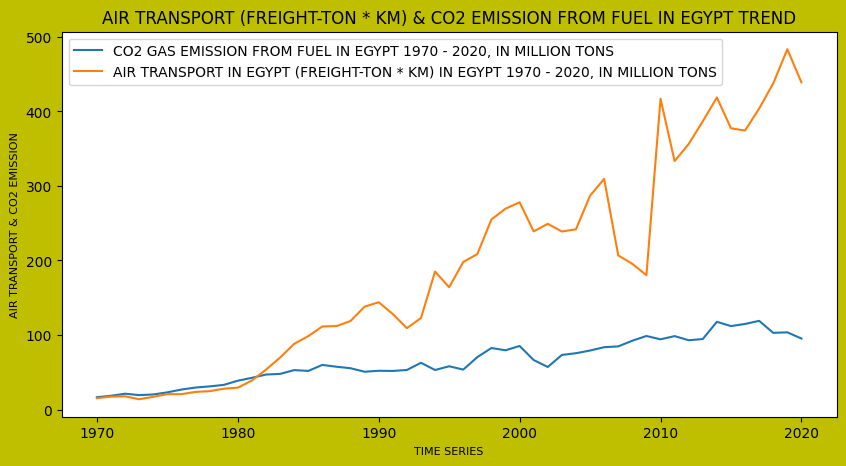

In [12]:
# PROBLEM: Does air transport freights increase in Egypt contribute to the increase in CO2 emission by fuel?
# Bringing in the air transport freights ton * km data & CO2 emissions data
airTransport = pd.read_csv('air-transport-freight-ton-km.csv')       # https://ourworldindata.org/search?q=transport
emissionCo2 = pd.read_csv('co2-emissions-by-fuel-line.csv')          # https://ourworldindata.org/emissions-by-fuel

# Selecting Egypt's air transport freights data and CO2 emissions by fuel from 1970 to 2020 from datasets
newDfEgyptAT = airTransport.loc[(airTransport['Entity'] == 'Egypt') & (airTransport['Year'] >= 1970)]
newDfEgyptCO2 = emissionCo2.loc[(emissionCo2['Entity'] == 'Egypt') & (emissionCo2['Year'] >= 1970)]

# Dropping unneeded columns from both datasets and sorting them by year
EgyptATFinal = newDfEgyptAT.drop(['Entity', 'Code'], axis = 1).sort_values(by = 'Year', ascending = True, ignore_index = True)
EgyptCO2Final = newDfEgyptCO2.drop(['Entity', 'Code', 'Annual CO2 emissions from flaring', 'Annual CO2 emissions from cement', 'Annual CO2 emissions from coal', 'Annual CO2 emissions from gas', 'Annual CO2 emissions from other industry'], axis=1).sort_values(by = 'Year', ascending = True, ignore_index = True)

# PLOTTING THE TRENDS
xYears = EgyptATFinal['Year'].values.reshape(-1, 1)
yCO2 = EgyptCO2Final['Annual CO2 emissions from oil']
yAirT = EgyptATFinal['Air transport, freight (million ton-km)']

plt.plot(xYears, yCO2 / 1000000, label = 'CO2 GAS EMISSION FROM FUEL IN EGYPT 1970 - 2020, IN MILLION TONS')
plt.plot(xYears, yAirT / 1000000, label = 'AIR TRANSPORT IN EGYPT (FREIGHT-TON * KM) IN EGYPT 1970 - 2020, IN MILLION TONS')
plt.title('AIR TRANSPORT (FREIGHT-TON * KM) & CO2 EMISSION FROM FUEL IN EGYPT TREND', fontsize = 12)
plt.xlabel('TIME SERIES', fontsize = 8)
plt.ylabel('AIR TRANSPORT & CO2 EMISSION', fontsize = 8)
plt.legend()
plt.show()

In [13]:
# Calculating the correlation coefficient between air transport freights and CO2 emissions by fuel
corrCoff = EgyptATFinal['Air transport, freight (million ton-km)'].corr(EgyptCO2Final['Annual CO2 emissions from oil'])
print("The correlation coefficient is", corrCoff)
# The correlation shows that there is a strong positive relationship between the air transport and CO2 emission from fuel Egypt's data 

The correlation coefficient is 0.9246357022655756


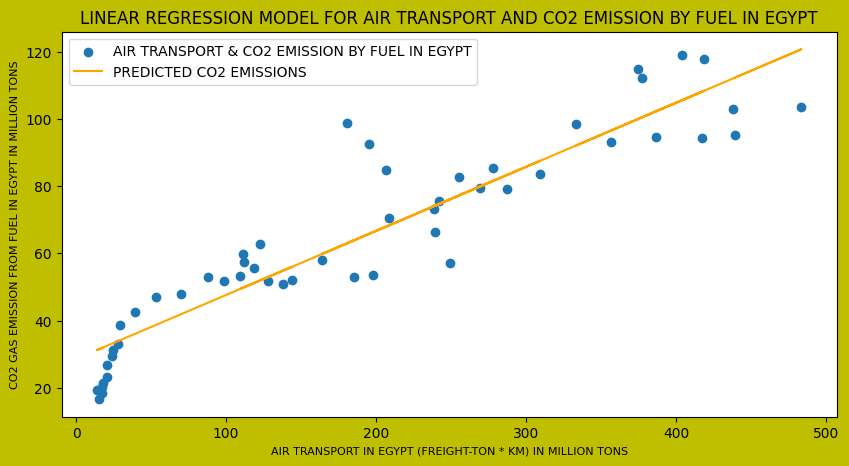

In [14]:
# Preparing the datasets for modelling
x = EgyptATFinal['Air transport, freight (million ton-km)'].values.reshape(-1, 1)
y = EgyptCO2Final['Annual CO2 emissions from oil']

# Plotting the data on a scatter plot to visualize correlation
plt.scatter(x / 1000000, y / 1000000, label = 'AIR TRANSPORT & CO2 EMISSION BY FUEL IN EGYPT')

# Fitting a regression model and predicting the CO2 emission byy fuel using scikitlearn
regr = LinearRegression()      # BUILDING A REGRESSION MODEL
regr.fit(x, y)                 # TRAINING IT

predictedY = regr.predict(x)   # ASKING IT FOR PREDICTIONS OF CO2 EMISSIONS, GIVEN AIR TRANSPORT FREIGHTS DATA

# Plotting the regression model predictions
plt.plot(x  / 1000000, predictedY  / 1000000, color = 'orange', label = 'PREDICTED CO2 EMISSIONS')

plt.title('LINEAR REGRESSION MODEL FOR AIR TRANSPORT AND CO2 EMISSION BY FUEL IN EGYPT', fontsize = 12)
plt.xlabel('AIR TRANSPORT IN EGYPT (FREIGHT-TON * KM) IN MILLION TONS', fontsize = 8)
plt.ylabel('CO2 GAS EMISSION FROM FUEL IN EGYPT IN MILLION TONS', fontsize = 8)
plt.legend()
plt.show()

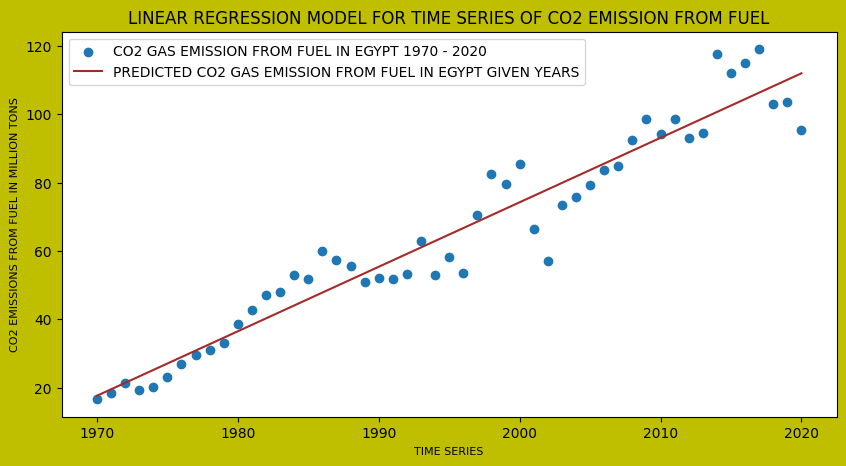

In [15]:
# WHAT WILL BE THE EMISSION IN 2022?
xYears = EgyptATFinal['Year'].values.reshape(-1, 1)
yCO2 = EgyptCO2Final['Annual CO2 emissions from oil']

regress = LinearRegression()               # BUILDING A REGRESSION MODEL
regress.fit(xYears, yCO2)                  # TRAINING THE MODEL WITH TIME SERIES
predictYCO2 = regress.predict(xYears)      # ASKING IT FOR PREDICTIONS OF CO2 EMISSIONS, GIVEN YEARS

# Plotting the time series for the CO2 emissions from 1970 to 2020
plt.scatter(xYears, yCO2 / 1000000, label = 'CO2 GAS EMISSION FROM FUEL IN EGYPT 1970 - 2020')
plt.plot(xYears, predictYCO2 / 1000000, color = 'brown', label = 'PREDICTED CO2 GAS EMISSION FROM FUEL IN EGYPT GIVEN YEARS')
plt.title('LINEAR REGRESSION MODEL FOR TIME SERIES OF CO2 EMISSION FROM FUEL', fontsize = 12)
plt.xlabel('TIME SERIES', fontsize = 8)
plt.ylabel('CO2 EMISSIONS FROM FUEL IN MILLION TONS', fontsize = 8)
plt.legend()
plt.show()

In [16]:
# Predicting the situation in 2022 using the above built model
cO2Emissions2022 = regress.predict([[2022]])
print('The predicted CO2 emissions in 2022 is', cO2Emissions2022[0])

# Calculating the t-test for the means of *two independent* samples of scores: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
tStatistic, pValue = stats.ttest_ind(EgyptATFinal['Air transport, freight (million ton-km)'], EgyptCO2Final['Annual CO2 emissions from oil'])

print(f"The p-value is {pValue:.9f}")
# This p-value indicate that the null hypothesis should be rejected.

The predicted CO2 emissions in 2022 is 115761410.57674217
The p-value is 0.000000012


### Question 4

4. Model Fitting and Prediction (20 points)

- The bank of Israel has published the data for unemployment rate (per 100 Israeli workforces) from 1980-12-31 to 2013-09-02. Download the data from Quandl (code: ODA/ISR_LUR) into MATLAB/Python. 
- Estimate the likely rate of unemployment by the year 2020 (10 points)✅
- Explain how one can evaluate the accuracy of the estimate (5 points) and provide the accuracy as a percentage. (5 points)✅

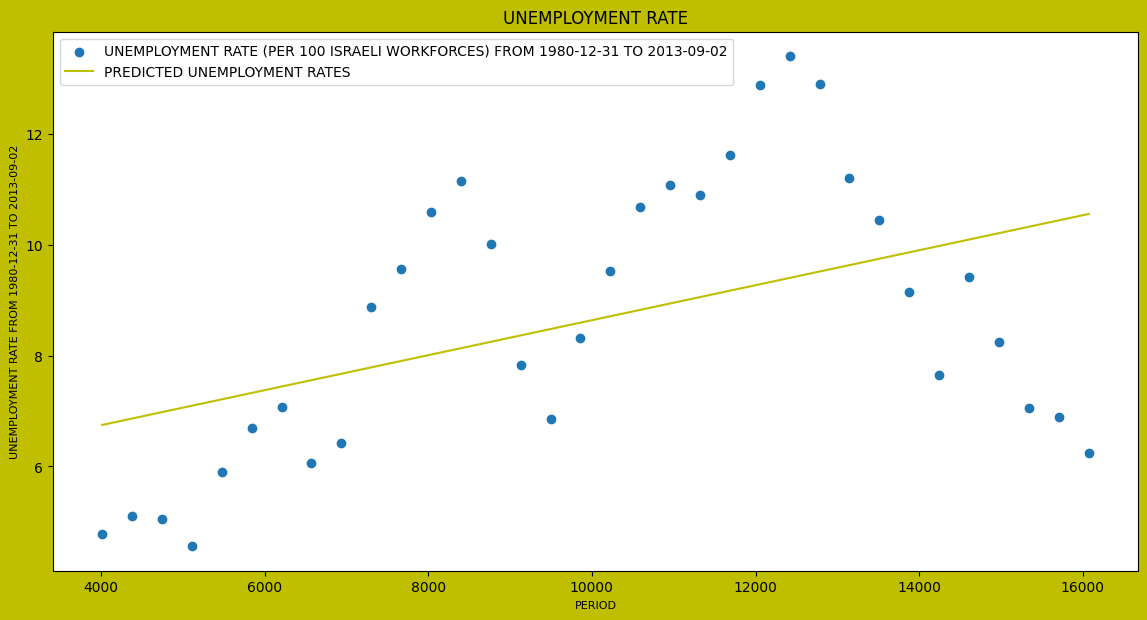

slope 0.000315611850876282
Intercept 5.482373696159563


array([ 4017,  4382,  4747,  5112,  5478,  5843,  6208,  6573,  6939,
        7304,  7669,  8034,  8400,  8765,  9130,  9495,  9861, 10226,
       10591, 10956, 11322, 11687, 12052, 12417, 12783, 13148, 13513,
       13878, 14244, 14609, 14974, 15339, 15705, 16070])

In [32]:
quandl.ApiConfig.api_key = 'V7N2sptsmqduHdyuAhSn'   # Specifying the API KEY
unEmpRate = quandl.get('ODA/ISR_LUR')               # Getting unemployment rate data

# Accessing or selecting the data between 1980-12-31 and 2013-09-02 period
unEmpRatePeriod = unEmpRate.loc['1980-12-31' : '2013-12-31']       # Filtering the data from 1980-12-31 to 2013-09-02
unEmpRatePeriod.reset_index(inplace = True)

# Date need to be converted into integer because they are in Y-M-D format string
xAsDateTime = unEmpRatePeriod['Date'].values.astype('datetime64[D]') # Changing string dates to datetime
xAsInt = xAsDateTime.astype(int)                                   # Casting or changing the datetime to its integer representation
xReshaped = xAsInt.reshape(-1, 1)                  # Making a new shape of array of arrays with one element per inner-array

y = unEmpRatePeriod['Value']

# slope, yIntercept, rCC, pVal, stdErr = stats.linregress(xAsInt, y)
# slope, yIntercept, rCC, pVal, stdErr = stats.linregress(xAsDatenum, y)

# Fitting linear regression model by using date as the independent variable and unemployment rates as the dependent variable
model = LinearRegression()                           # Creating a model
model.fit((xReshaped), y)                            # Training the model to learn the patterns in our data
predY = model.predict(xReshaped)                     # Asking it to predict the unemployment rate given the dates

# Plotting the data and the prediction
plt.rcParams["figure.figsize"] = (14, 7)
plt.rcParams["figure.facecolor"] = "y"
plt.rcParams["figure.edgecolor"] = "r"
plt.title("UNEMPLOYMENT RATE", fontsize = 12)
plt.ylabel("UNEMPLOYMENT RATE FROM 1980-12-31 TO 2013-09-02", fontsize = 8)
plt.xlabel("PERIOD", fontsize = 8)

plt.scatter(xReshaped, y, label = 'UNEMPLOYMENT RATE (PER 100 ISRAELI WORKFORCES) FROM 1980-12-31 TO 2013-09-02')
plt.plot(xReshaped, predY, color = 'y', label = 'PREDICTED UNEMPLOYMENT RATES')
plt.legend()
plt.show()
print('slope', slope)
print('Intercept', yIntercept)
xAsInt

In [36]:
# Predicting the rate of unemployment by 2020
dateBy2020 = np.datetime64('2020-12-31')                # Preparing the 2020 date to predict
dateBy2020 = dateBy2020.astype(int).reshape(-1, 1)
predictionBy2020 = model.predict(dateBy2020)

print("The employment rate in 2020 will be", predictionBy2020[0])

The employment rate in 2020 will be 11.361275642432068


In [34]:
# MAPE function to evaluate the performance of the model
def calculateMAPE(y, predictedY):
    theMAPE = np.mean(np.abs((y - predictedY) / y)) * 100
    return theMAPE

# https://www.askpython.com/python/examples/mape-mean-absolute-percentage-error#:~:text=What%20is%20MAPE%3F,termed%20by%20the%20model%20evaluation.
mape = calculateMAPE(y, predY)  # Calculating the MAPE: MODEL EVALUATION
print("The Mean Absolute Percentage Error (MAPE) is", mape, "%")


# mp = mean_absolute_percentage_error(y, predY) * 100
# mp

The Mean Absolute Percentage Error (MAPE) is 23.710851338953564 %
